In [6]:
import csv
import math
import pandas as pd
from describe import Math_calculat
from describe import DataSet
import numpy as np
import sys
import matplotlib.pyplot as plot

In [9]:
class Scatter_Plot:
    """
        - Scatter_Plot allow see connect data of two columns. Scatter Plot answer on question:
                What are the two features that are similar ?
        - Example to run:
            >> from describe import Math_calculat
            >> from describe import DataSet
            >> from scatter_plot import Scatter_plot
            >> sp = Scatter_Plot()
            >> sp.Plot(6, 8)
    """
    def __init__(self, file='data.csv', size=10, legend=1):
        self.file_name = file
        self.y_col = 1
        self.size = size
        self.legend = legend
        if size < 0:
            print("Error: bad parameter : size")
            sys.exit()

    def Plot(self, name_col1=7, name_col2=8, house_class=['M', 'B']):
        """
        Plot built scatter Plot two columns.

        :param name_col1: first numeric column from dataset. Can accept index (int) and name (str) columns
        :param name_col2:   second numeric column from dataset. Can accept index (int) and name (str) columns
        :param house_class: It's classes from Hogwarts House, default use all four classes.
        :return:
        """
        ds = DataSet(self.file_name)
        col_mas_name = [name_col1, name_col2]
        for i in range(2):
            if (type(col_mas_name[i]) is str):
                if col_mas_name[i] in ds.dataset[0]:
                    col_mas_name[i] = ds.dataset[0].index(col_mas_name[i])
                else:
                    print('Error: bad name column')
                    return

        for i in range(2):
            if col_mas_name[i] < 0 or col_mas_name[i] >= len(ds.dataset[0]):
                print("Error: This isn't column")
                return
            if not ds.isNumeric_columns(col_mas_name[i]):
                print("Error: Input column must is numerics")
                return
        if self.size > (len(ds.dataset) - 1):
            self.size = len(ds.dataset) - 1
        col1 = ds.get_float_col(col_mas_name[0])
        col2 = ds.get_float_col(col_mas_name[1])
        color = {
            'M': 'b',
            'B': 'r',
        }

        feature1 = {}
        feature2 = {}
#         house_class = [i for i in house_class if i in set(ds.get_col(self.y_col))] if house_class else set(ds.get_col(self.y_col))
#         house_class = set(ds.get_col(self.y_col)) if not house_class else house_class
        for i in house_class:
            feature1[i] = []
            feature2[i] = []
        for i in range(1, len(ds.dataset)):
            if ds.dataset[i][self.y_col] in house_class:
                feature1[ds.dataset[i][self.y_col]].append(col1[i - 1])
                feature2[ds.dataset[i][self.y_col]].append(col2[i - 1])
        for i in feature1.keys():
            plot.scatter(feature1[i][:self.size], feature2[i][:self.size], c=color[i], alpha=0.5, label=i)
        if self.legend:
            plot.legend(loc='upper right')
        plot.ylabel('column is {}'.format(col_mas_name[1]))
        plot.xlabel('column is {}'.format(col_mas_name[0]))
        plot.title('Scatter Plot')
        plot.show()


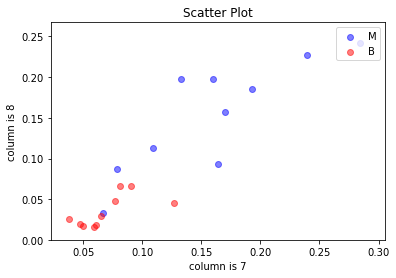

In [10]:
sc = Scatter_Plot()
sc.Plot()